# Laboratorio de Astrofisica: ONDAS GRAVITACIONALES

En esta practica se han estudiado las ondas gravitacionales detectadas por el experimento [LIGO](https://www.ligo.org/sp/index.php). Para ello se han identificado las tres partes de la fusion del sistema binario, obteniendo los datos de la fase inspiral, en la cual se pueden utilizar las aproximaciones clasicas para obtener datos exactos. A continuacion se han obtenido las frecuencias de oscilacion en funcion del tiempo para esta zona, asi como su derivada. Con estos datos se han calculado la masa de chirp y la distancia luminica.

Para la Masa de Chirp se ha utilizado la siguiente ecuacion:

$$\dot{f} = \frac{96}{5}\frac{\pi^{8/3}}{c^5}f^{11/3}(GM_C)^{5/3} $$

Para la distacia luminica se ha utilizado la siguiente ecuacion:

$$D_L \simeq \frac{5}{96 \pi^2} \frac{2c}{h} \frac{\dot{f}}{f^3} $$

Para ambas ecuaciones ha sido necesario obtener previamente la frecuencia y su derivada.

### Cargar los paquetes que se utilizan y algunas constantes

Para realizar el analisis de los datos se han realizado una serie de scripts escritos en python. Ademas se han utilizado los paquetes _numpy_ (para algunos calculos)y _matplotlib_ (para la representacion en graficas). 

Por otro lado, se almacenan ya algunas constantes universales que se van a utilizar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

c = 299792458 # set speed of ligth [m/s]
G = 6.67408 * (10**(-11.0)) # set gravitational constant [m**3 kg**-1 s**-2]
MS = 1.9891*10**(30.0) # Masa del Sol [kg]
m2pc = 3.24078*(10**(-23.0)) # 1 metro -> 3.24078*(10**(-23)) Mpc

# Obtencion y transformacion de los datos

Los datos utilizados para esta practica son los del modelo de relatividad numerica que mejor ajusta a los datos de los detectores obtenidos de la pagina oficial de [LIGO](https://www.gw-openscience.org/GW150914data/P150914/fig2-unfiltered-waveform-H.txt). En caso de utilizar otros datos, tan solo habria que cambiar la url, teniendo en cuenta que han de tener el mismo formato. Los datos se obtienen gracias al paquete de python _wget_.

In [2]:
import wget

url = "https://www.gw-openscience.org/GW150914data/P150914/fig2-unfiltered-waveform-H.txt"
Data = wget.download(url)

Una vez descargados los datos se ha de transformar desde el txt para poder utilizarlos en python. En dicho fichero los datos se organizan en dos columnas, la primera columna corresponde al tiempo y el segundo al strain. No obstante, dicho valor ha de multiplicarse por un orden de magnitud de -21. $$strain \cdot 10^{-21}$$.

In [3]:
with open(Data, 'r') as fr:
    time = [] # lista vacia para el tiempo
    strain = [] # lista vacia para el strain
    
    line = fr.readline() # La primera linea corresponde a los titulos
    line = fr.readline()

    while line != '':
        t, s = line.split(" ") # las columnas estan separadas por un espacio en blanco
        time.append(float(t))
        strain.append(float(s)*(10**(-21))) # a la columna del strain se le ha de multiplicar por 10**-21
        line = fr.readline()

## Representacion de los Datos Brutos

A continuacion se representa la onda de los datos obtenidos respecto al tiempo.

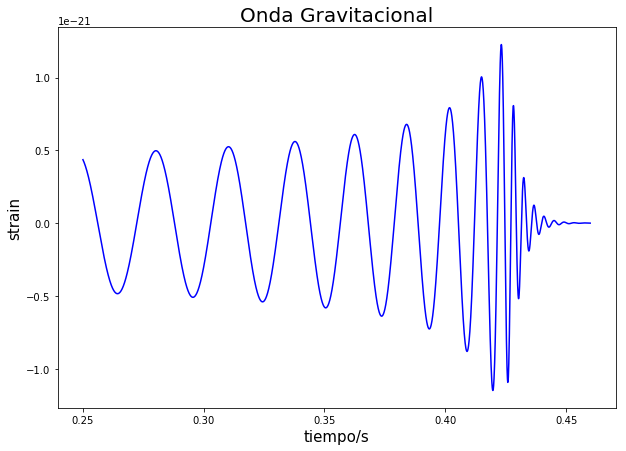

In [4]:
#################################
###          GRAFICA          ###
#################################

ax = plt.figure(figsize=(10, 7)).add_subplot(111)
ax.plot(time, strain, 'b')

#---------------------
#      TITULOS        
#---------------------

ax.set_title("Onda Gravitacional", fontsize=20)
ax.set_xlabel("tiempo/s", fontsize=15)
ax.set_ylabel("strain", fontsize=15)
plt.show()

---
De la figura anterior se pueden observar 3 zonas diferentes que corresponden a las tres fases de la fusion de un sistema binario.

En la figura siguiente se representan las diferentes zonas con diferentes colores. La zona <span style="color:blue"> _inspiral_ </span> corresponde a la situacion justo anterior a la fusion (color azul), la zona <span style="color:red"> _merger_ </span> al momento de fusion (zona roja) y la fase <span style="color:green"> _ringdown_ </span> a la de justo despues de la fusion. Los limites que se han tomado para estas tres zonas son:

$$\begin{matrix}
    \textrm{Inspiral} & \rightarrow & t \leq 0.40 \\
    \textrm{merger} & \rightarrow & 0.40 < t < 0.43 \\
    \textrm{ringdown} & \rightarrow & t \geq 0.43  \\
\end{matrix}
$$

Para la realizacion de la practica interesa la fase _inspiral_ en la que se pueden aplicar las aproximaciones necesarias para el calculo.

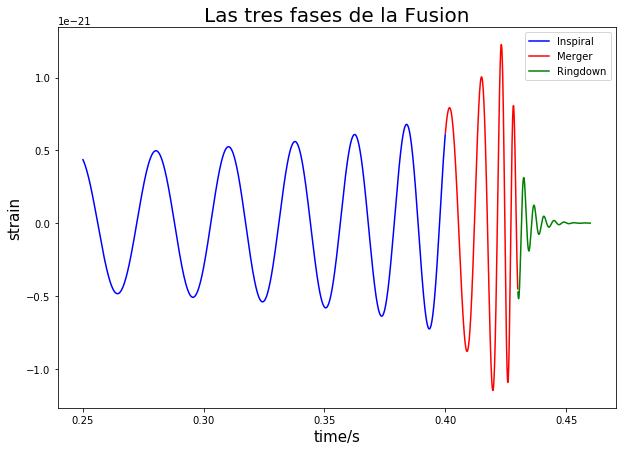

In [5]:
# Se dividen los datos entre variables segun la fase de la que se trate en
# cada variable, la primera lista corresponde al tiempo y la segunda al strain
inspiral = [[], []]
merger = [[], []]
ringdown = [[], []]

# Se reparten los valores de tiempo y strain entre las
# tres fases diferentes con las restricciones anteriores
for i in range(len(time)):
    # zona inspiral t <= 0.40
    if time[i] <= 0.40:
        inspiral[0].append(time[i])
        inspiral[1].append(strain[i])
    # zona merger 0.40 < t < 0.43
    elif time[i] > 0.40 and time[i] < 0.43:
        merger[0].append(time[i])
        merger[1].append(strain[i])
    # zona ringdown t >= 0.43
    elif time[i] >= 0.43:
        ringdown[0].append(time[i])
        ringdown[1].append(strain[i])
        

#################################
###          GRAFICA          ###
#################################

ax = plt.figure(figsize=(10, 7)).add_subplot(111)
# zona inspiral en color azul
ax.plot(inspiral[0], inspiral[1], 'b', label='Inspiral')
# zona merger en color rojo
ax.plot(merger[0], merger[1], 'r', label='Merger')
# zona ringdown en color verde
ax.plot(ringdown[0], ringdown[1], 'g', label='Ringdown')

#---------------------
#      TITULOS        
#---------------------

ax.set_title("Las tres fases de la Fusion", fontsize=20)
ax.set_xlabel("time/s", fontsize=15)
ax.set_ylabel("strain", fontsize=15)
ax.legend()
plt.show()

## Procesamiento de los Datos

---
### Obtencion de la frecuencia y su derivada

La frecuencia se ha obtenido como la inversa del periodo de oscilacion. El periodo se ha obtenido como la diferencia de tiempos entre maximos y entre minimos. Para realizar la representacion respecto al tiempo se toma el tiempo medio entre los dos picos de los que se han obtenido el periodo.

<img align="left" width="400" height="200" src="./periodo.png">

La condicion para los maximos ha sido que su strain sea mayor que el siguiente y el anterior valor. La condicion para los maximos ha sido que su strain sea mayor que el siguiente y el anterior valor.

$$
\begin{matrix}
\begin{matrix} 
maximo & \rightarrow & t[n-1] < t[n] > t[n+1]
\\
\\
minimo & \rightarrow & t[n-1] > t[n] < t[n+1]
\end{matrix}
& 
\left\|\begin{matrix}
\\ \\ \\ \\ \\ \\
\end{matrix}\right.
&
\begin{matrix}
P_n = t_p[n] - t_p[n-1]
\\
\\
\nu_n = \frac {1}{P_n}
\\
\\
t_n = t[n] + \frac{P_n}{2}
\end{matrix}
\end{matrix}$$

+-------------------------------------------------+
| Frecuencia en la zona Inspiral: 39.5 +- 6.0 Hz  |
+-------------------------------------------------+


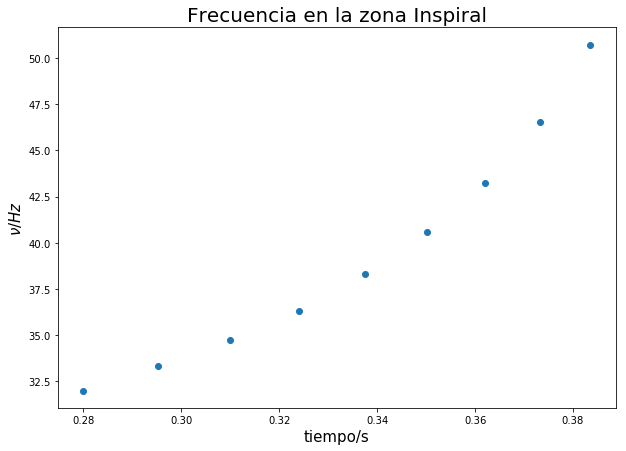

In [6]:
picos = [] # valores del tiempo para los picos maximos y minimos

# Se obtienen los valores del tiempo para los maximosy los minimos
for i in range(1, len(inspiral[0])-1):
    # maximos
    if (inspiral[1][i] > inspiral[1][i+1] 
                                and inspiral[1][i] > inspiral[1][i-1]):
        picos.append(inspiral[0][i])
    # minimos
    if (inspiral[1][i] < inspiral[1][i+1] 
                                and inspiral[1][i] < inspiral[1][i-1]):
        picos.append(inspiral[0][i])

frq = [] # lista con las frecuencias
tiempo = [] # lista con los tiempos de cada frecuencia

# [maximo, minimo, maximo, minimo, maximo, minimo]
#     |______________|       |---------------|

for i in range(len(picos)-2):
    Periodo = (picos[i+2]-picos[i])
    tiempo.append(picos[i]+Periodo/2)
    frq.append(1/Periodo)
        
print "+-------------------------------------------------+"
print "| Frecuencia en la zona Inspiral: %1.1f +- %1.1f Hz  |" %(np.mean(frq), np.std(frq))
print "+-------------------------------------------------+"

#################################
###          GRAFICA          ###
#################################

ax = plt.figure(figsize=(10, 7)).add_subplot(111)
ax.plot(tiempo, frq, 'o')

#---------------------
#      TITULOS        
#---------------------

ax.set_title("Frecuencia en la zona Inspiral", fontsize=20)
ax.set_xlabel("tiempo/s", fontsize=15)
ax.set_ylabel("$\\nu / Hz$", fontsize=15)
plt.show()

De esta forma se han obtenido 9 valores de frecuencia. Para obtener mas puntos se realiza un ajuste a los datos por un polinomio de grado 8. Se ha realizado este ajuste debido a que un conjunto de n puntos siempre se puede ajustar a un polinomio de grano n-1. 

Una vez obtenido el polinomio del ajuste se aplica a los valores del tiempo obtenidos en la zona inspiral y dentro del intervalo en el que se han obtenido las frecuencias, obteniendo un valor para la frecuencia en cada punto.

Frecuencia en la zona Inspiral: 38.6 +- 5.1 Hz


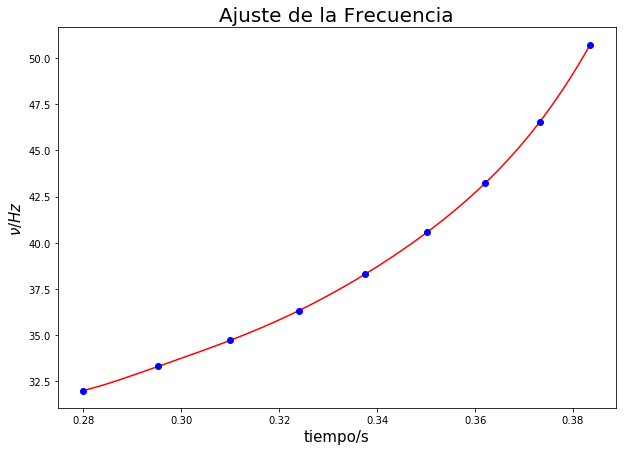

In [7]:
parameters = np.polyfit(tiempo, frq, 8)
timTeo = []
for tim in inspiral[0]:
    if min(tiempo) < tim and tim < max(tiempo):
        timTeo.append(tim)
timTeo = np.asarray(timTeo)
frqTeo = parameters[8]
for i in range(len(parameters)-1):
    frqTeo += parameters[i]*(timTeo**(8-i))

print "Frecuencia en la zona Inspiral: %1.1f +- %1.1f Hz"%(np.mean(frqTeo), np.std(frqTeo))

#################################
###          GRAFICA          ###
#################################

ax = plt.figure(figsize=(10, 7)).add_subplot(111)
ax.plot(timTeo, frqTeo, 'r')
ax.plot(tiempo, frq, 'bo')

#---------------------
#      TITULOS        
#---------------------

ax.set_title("Ajuste de la Frecuencia", fontsize=20)
ax.set_xlabel("tiempo/s", fontsize=15)
ax.set_ylabel("$\\nu / Hz$", fontsize=15)
plt.show()

Se observa como con este metodo la frecuencia media disminuye hasta en una unidad, asi como su error.
___
Puesto que se ha obtenido la frecuencia a partir del ajuste de un polinomio de grado 8, es facil obtener su derivada como la derivada de dicho polinomio.

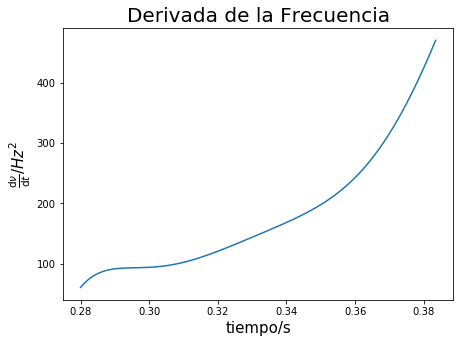

In [8]:
frqDrv = 0
for i in range(len(parameters)-1):
    frqDrv += (8-i)*parameters[i]*(timTeo**(8-i-1))

#################################
###          GRAFICA          ###
#################################

ax = plt.figure(figsize=(7, 5)).add_subplot(111)
ax.plot(timTeo, frqDrv)

#---------------------
#      TITULOS        
#---------------------

ax.set_title("Derivada de la Frecuencia", fontsize=20)
ax.set_xlabel("tiempo/s", fontsize=15)
ax.set_ylabel("$\\frac{\\mathrm{d} \\nu}{\\mathrm{d} t} / Hz^2$", fontsize=15)
plt.show()

---
### Masa de Chirp

Una vez obtenidas las frecuencias y su derivada, se obtiene la Masa de Chirp a partir de la ecuacion:

$$M_C^{5/3} = \frac{5}{96}\frac{c^5}{\pi^{8/3}}f^{-11/3}\frac{\dot{f}}{G^{5/3}} $$

Por otro lado, se compara con el resultado teorico obtenido a partir de la ecuacion teorica de la masa de Chirp, tomando las masa $m_1 = 29.1 \; M_{\odot}$ y $m_2 = 36.2 \; M_{\odot}$ que aparecen en la pagina de [LIGO](https://www.ligo.org/sp/index.php)

$$ M_C = \frac {(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}} $$

+-------------------+------------------------------+
| Mchirp obtenida:  |  (37.9 +- 1.2) Masas solares |
| Mchirp Teorica:   |  28.22138      Massa Solares |
+-------------------+------------------------------+


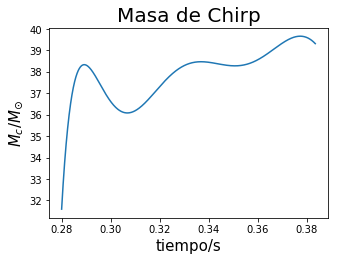

In [9]:
MasaC = ((frqDrv*5.0*(c**5.0)) / ((frqTeo**(11/3.0)) 
                * 96.0 * (np.pi**(8.0/3)) * (G**(5.0/3))))**(3/5.0)
MasaC = MasaC/MS
    
McTh = ((29.1*36.2)**(3/5.0)) / (((29.1+36.2))**(1/5.0))

print "+-------------------+------------------------------+"
print "| Mchirp obtenida:  |  (%1.1f +- %1.1f) Masas solares |" %(np.mean(MasaC), np.std(MasaC))
print "| Mchirp Teorica:   |  %.5f      Massa Solares |" %(McTh) 
print "+-------------------+------------------------------+"
    
#################################
###          GRAFICA          ###
#################################

ax = plt.figure(figsize=(5, 3.5)).add_subplot(111)
ax.plot(timTeo, MasaC)

#---------------------
#      TITULOS        
#---------------------

ax.set_title("Masa de Chirp", fontsize=20)
ax.set_xlabel("tiempo/s", fontsize=15)
ax.set_ylabel("$M_c / M_{\odot}$", fontsize=15)
plt.show()

Se puede observar como la $M_C$ obtenida de los datos es mucho mayor que la teorica, no siendo compatible con dicho valor. Sin embargo, el hecho de que sean del mismo orden de magnitud ambos valores, hace pensar que el valor obtenido no es tan distante al valor teorico, teniendo en cuenta todas las aproximaciones realizadas.

$$\begin{matrix}
\left.\begin{matrix}\begin{matrix}
M_c = \frac {(m_1m_2)^{3/5}}{(m_1 + m_2)^{1/5}} = \frac {(m_1\cdot qm_1)^{3/5}}{(m_1 + (qm_1))^{1/5}}\\ 
\\
M_c = \frac{q^{3/5}}{(q+1)^{1/5}} \frac{(m_1)^{6/5}}{(m_1)^{1/5}} = \frac{q^{3/5}}{(q+1)^{1/5}} \cdot m_1
\end{matrix} 
& &\end{matrix} \right \|
&
\begin{matrix}
M_{Total} = m_1 + m_2 = m1 + (q\cdot m_1) = (q+1) \cdot m_1 \\
\\
M_{Total} = (q+1) \frac{(q+1)^{1/5}}{q^{3/5}} M_c = \frac{(q+1)^{6/5}}{q^{3/5}} M_c
\end{matrix}
\end{matrix}$$

+-------------------+------------------------------+
| MTotal obtenida:  |  87.1 Masas solares          |
+-------------------+------------------------------+
|                  para q = 1.0                    |
+-------------------+------------------------------+


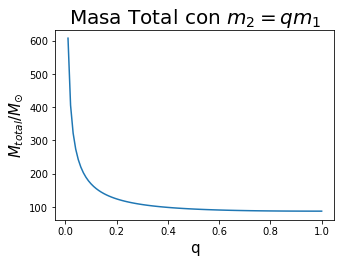

In [10]:
MassC = np.mean(MasaC)
MasaTotal = 29.1+36.2
qs = np.linspace(0,1,101)
qs = qs[1:]

MassT = MassC * (((qs+1)**(6/5.0)/(qs)**(3/5.0)))

qIndex = qs[np.where(np.min(MassT) == MassT)]

print "+-------------------+------------------------------+"
print "| MTotal obtenida:  |  %1.1f Masas solares          |" %(np.min(MassT))
print "+-------------------+------------------------------+"
print "|                  para q = %1.1f                    |" %(qIndex)
print "+-------------------+------------------------------+"

#################################
###          GRAFICA          ###
#################################

ax = plt.figure(figsize=(5, 3.5)).add_subplot(111)
ax.plot(qs, MassT)

#---------------------
#      TITULOS        
#---------------------

ax.set_title("Masa Total con $m_2 = qm_1$", fontsize=20)
ax.set_xlabel("q", fontsize=15)
ax.set_ylabel("$M_{total} / M_{\odot}$", fontsize=15)
plt.show()

---
### Distancia Luminica

A parte de la Masa de Chirp, tambien se pueden obtener a partir de la frecuencia y su derivada la distancia luminica de los dos agujeros negros a partir de la ecuacion:

$$D_L \simeq \frac{5}{96 \pi^2} \frac{2c}{h} \frac{\dot{f}}{f^3} $$

En dicha ecuacion aparece de nuevo el _strain_ ($h$), por lo que sera necesario obtener los _strain_ para los tiempos en los que hemos calculado las frecuencias.

+----------------------------------------------+
|       Distancia DL:    (815 +- 109) Mpc      |
+----------------------------------------------+


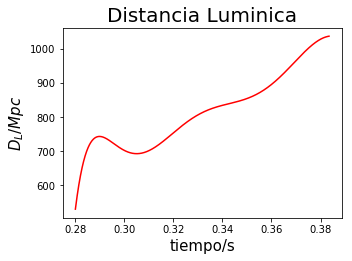

In [11]:
indexMinH = inspiral[0].index(min(timTeo))
indexMaxH = inspiral[0].index(max(timTeo))+1
h = inspiral[1][indexMinH:indexMaxH]
h = np.asarray(h)

Dl = (5*2*(c*m2pc)*frqDrv)/(96*(np.pi**2.0)*np.mean(abs(h))*(frqTeo**3.0))

print "+----------------------------------------------+"
print "|       Distancia DL:    (%1.0f +- %1.0f) Mpc      |" %(np.mean(Dl), np.std(Dl))
print "+----------------------------------------------+"

#################################
###          GRAFICA          ###
#################################

ax = plt.figure(figsize=(5, 3.5)).add_subplot(111)
ax.plot(timTeo, Dl, 'r')

#---------------------
#      TITULOS        
#---------------------

ax.set_title("Distancia Luminica", fontsize=20)
ax.set_xlabel("tiempo/s", fontsize=15)
ax.set_ylabel("$D_L / Mpc$", fontsize=15)
plt.show()

Nuevamente, se obtiene un valor para la distancia luminica mucho mayor que la teorica de $420 +150/-180$, no siendo tampoco compatible. No obstante, al igual que para la Masa de Chirp, el hecho de que sean del mismo orden de magnitud ambos valores, hace pensar que el valor obtenido no es tan distante al valor teorico, teniendo en cuenta todas las aproximaciones realizadas.

Ademas, se observa que el valor obtenido mediante la aproximacion es aproximadamente el doble que el valor esperado

In [12]:
Dl = (5*(c*m2pc)*frqDrv)/(96*(np.pi**2.0)*np.mean(abs(h))*(frqTeo**3.0))

print "+----------------------------------------------+"
print "|       Distancia DL:    (%1.0f +- %1.0f) Mpc       |" %(np.mean(Dl), np.std(Dl))
print "+----------------------------------------------+"

+----------------------------------------------+
|       Distancia DL:    (408 +- 54) Mpc       |
+----------------------------------------------+
